**Project: Digit Recognizer** 

#**Ingest**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from datetime import datetime
import time

In [ ]:
drive.mount('/content/gdrive')
train=pd.read_csv('gdrive/My Drive/train05.csv')
test=pd.read_csv('gdrive/My Drive/test05.csv')

Mounted at /content/gdrive


#**EDA**

In [ ]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [ ]:
y=train['label']
train.drop("label",axis=1,inplace=True)
x = train.values

In [ ]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=123)

In [ ]:
print(x_train_full.shape)
print(x_test.shape)

(33600, 784)
(8400, 784)


In [ ]:
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.0

print(x_valid.shape)
print(x_train.shape)

(5000, 784)
(28600, 784)


In [ ]:
x_train = x_train.reshape(28600, 784)
x_valid = x_valid.reshape(5000, 784)
x_test = x_test.reshape(8400, 784)
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train.shape

(28600, 784)

# **Model & Evaluate**

Model 1: 2 Layers with 10 nodes per Layer

In [ ]:
start=datetime.now()
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history1 = model1.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))
end=datetime.now()
t=end-start
print(t)

Epoch 1/30
894/894 [==============================] - 2s 2ms/step - loss: 1.6174 - accuracy: 0.4608 - val_loss: 0.6985 - val_accuracy: 0.8176
Epoch 2/30
894/894 [==============================] - 1s 1ms/step - loss: 0.6139 - accuracy: 0.8386 - val_loss: 0.4895 - val_accuracy: 0.8638
Epoch 3/30
894/894 [==============================] - 1s 2ms/step - loss: 0.4541 - accuracy: 0.8712 - val_loss: 0.4226 - val_accuracy: 0.8792
Epoch 4/30
894/894 [==============================] - 1s 1ms/step - loss: 0.3856 - accuracy: 0.8900 - val_loss: 0.3891 - val_accuracy: 0.8912
Epoch 5/30
894/894 [==============================] - 1s 1ms/step - loss: 0.3637 - accuracy: 0.8969 - val_loss: 0.3705 - val_accuracy: 0.8962
Epoch 6/30
894/894 [==============================] - 1s 1ms/step - loss: 0.3427 - accuracy: 0.9021 - val_loss: 0.3571 - val_accuracy: 0.9006
Epoch 7/30
894/894 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.9044 - val_loss: 0.3466 - val_accuracy: 0.9044
Epoch 

In [ ]:
model1.save("my_keras_model.h6-1")

INFO:tensorflow:Assets written to: my_keras_model.h6-1/assets


Model 2: 2 Layers with 20 nodes per Layer (except the output layer with 10 nodes)

In [ ]:
start=datetime.now()
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history2 = model2.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))
end=datetime.now()
t=end-start
print(t)

Epoch 1/30
894/894 [==============================] - 2s 2ms/step - loss: 1.6600 - accuracy: 0.4903 - val_loss: 0.5958 - val_accuracy: 0.8512
Epoch 2/30
894/894 [==============================] - 1s 2ms/step - loss: 0.5182 - accuracy: 0.8702 - val_loss: 0.4287 - val_accuracy: 0.8822
Epoch 3/30
894/894 [==============================] - 1s 1ms/step - loss: 0.3958 - accuracy: 0.8921 - val_loss: 0.3750 - val_accuracy: 0.8954
Epoch 4/30
894/894 [==============================] - 1s 1ms/step - loss: 0.3568 - accuracy: 0.9012 - val_loss: 0.3507 - val_accuracy: 0.9052
Epoch 5/30
894/894 [==============================] - 1s 2ms/step - loss: 0.3192 - accuracy: 0.9068 - val_loss: 0.3341 - val_accuracy: 0.9056
Epoch 6/30
894/894 [==============================] - 1s 1ms/step - loss: 0.3023 - accuracy: 0.9154 - val_loss: 0.3178 - val_accuracy: 0.9118
Epoch 7/30
894/894 [==============================] - 1s 2ms/step - loss: 0.2847 - accuracy: 0.9182 - val_loss: 0.3121 - val_accuracy: 0.9138
Epoch 

In [ ]:
model2.save("my_keras_model.h6-2")

INFO:tensorflow:Assets written to: my_keras_model.h6-2/assets


Model 3: 5 Layers with 10 nodes per Layer

In [ ]:
start=datetime.now()
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history3 = model3.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))
end=datetime.now()
t=end-start
print(t)

Epoch 1/30
894/894 [==============================] - 2s 2ms/step - loss: 2.1923 - accuracy: 0.1398 - val_loss: 1.6835 - val_accuracy: 0.3446
Epoch 2/30
894/894 [==============================] - 1s 2ms/step - loss: 1.5428 - accuracy: 0.4155 - val_loss: 1.1077 - val_accuracy: 0.5914
Epoch 3/30
894/894 [==============================] - 1s 2ms/step - loss: 0.9290 - accuracy: 0.6982 - val_loss: 0.6895 - val_accuracy: 0.8080
Epoch 4/30
894/894 [==============================] - 1s 2ms/step - loss: 0.6371 - accuracy: 0.8205 - val_loss: 0.5587 - val_accuracy: 0.8482
Epoch 5/30
894/894 [==============================] - 1s 2ms/step - loss: 0.5281 - accuracy: 0.8530 - val_loss: 0.5097 - val_accuracy: 0.8600
Epoch 6/30
894/894 [==============================] - 1s 2ms/step - loss: 0.4573 - accuracy: 0.8724 - val_loss: 0.4653 - val_accuracy: 0.8698
Epoch 7/30
894/894 [==============================] - 1s 2ms/step - loss: 0.4077 - accuracy: 0.8845 - val_loss: 0.4405 - val_accuracy: 0.8748
Epoch 

In [ ]:
model3.save("my_keras_model.h6-3")

INFO:tensorflow:Assets written to: my_keras_model.h6-3/assets


Model 4: 5 Layers with 20 nodes per Layer (except the output layer with 10 nodes)

In [ ]:
start=datetime.now()
model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history4 = model4.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))
end=datetime.now()
t=end-start
print(t)

Epoch 1/30
894/894 [==============================] - 2s 2ms/step - loss: 1.9527 - accuracy: 0.3128 - val_loss: 0.7840 - val_accuracy: 0.7612
Epoch 2/30
894/894 [==============================] - 1s 2ms/step - loss: 0.6259 - accuracy: 0.8112 - val_loss: 0.4963 - val_accuracy: 0.8474
Epoch 3/30
894/894 [==============================] - 1s 2ms/step - loss: 0.4052 - accuracy: 0.8794 - val_loss: 0.3833 - val_accuracy: 0.8836
Epoch 4/30
894/894 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.9039 - val_loss: 0.3593 - val_accuracy: 0.8970
Epoch 5/30
894/894 [==============================] - 1s 2ms/step - loss: 0.2900 - accuracy: 0.9162 - val_loss: 0.3084 - val_accuracy: 0.9098
Epoch 6/30
894/894 [==============================] - 1s 2ms/step - loss: 0.2674 - accuracy: 0.9228 - val_loss: 0.3112 - val_accuracy: 0.9114
Epoch 7/30
894/894 [==============================] - 2s 2ms/step - loss: 0.2413 - accuracy: 0.9289 - val_loss: 0.2695 - val_accuracy: 0.9262
Epoch 

In [ ]:
model4.save("my_keras_model.h6-4")

INFO:tensorflow:Assets written to: my_keras_model.h6-4/assets


In [ ]:
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + float(s)


t1=get_sec('0:00:41.346502')
t2=get_sec('0:00:42.431662')
t3=get_sec('0:00:43.481919')
t4=get_sec('0:00:44.028939')

In [ ]:
atrain1=history1.history['accuracy'][29]
atrain2=history2.history['accuracy'][29]
atrain3=history3.history['accuracy'][29]
atrain4=history4.history['accuracy'][29]

In [ ]:
model1 = keras.models.load_model("my_keras_model.h6-1")
model2 = keras.models.load_model("my_keras_model.h6-2")
model3 = keras.models.load_model("my_keras_model.h6-3")
model4 = keras.models.load_model("my_keras_model.h6-4")

metrics1 = model1.evaluate(x_test, y_test, verbose=2)
metrics2 = model2.evaluate(x_test, y_test, verbose=2)
metrics3 = model3.evaluate(x_test, y_test, verbose=2)
metrics4 = model4.evaluate(x_test, y_test, verbose=2)

atest1=metrics1[1]
atest2=metrics2[1]
atest3=metrics3[1]
atest4=metrics4[1]

263/263 - 0s - loss: 0.2783 - accuracy: 0.9198
263/263 - 0s - loss: 0.2185 - accuracy: 0.9365
263/263 - 0s - loss: 0.3132 - accuracy: 0.9167
263/263 - 0s - loss: 0.1919 - accuracy: 0.9489


In [ ]:
d = {'Number of Layers': [2,2,5,5], 'Nodes per Layer': [10,20,10,20], 'Processing Time': [t1,t2,t3,t4],'Training Set Accuracy': [atrain1,atrain2,atrain3,atrain4],'Test Set Accuracy': [atest1,atest2,atest3,atest4]}
output = pd.DataFrame(data=d)
output

,Number of Layers,Nodes per Layer,Processing Time,Training Set Accuracy,Test Set Accuracy
0,2,10,41.346502,0.930385,0.919762
1,2,20,42.431662,0.950420,0.936548
2,5,10,43.481919,0.940245,0.916667
3,5,20,44.028939,0.970594,0.948929


Model 4 Status

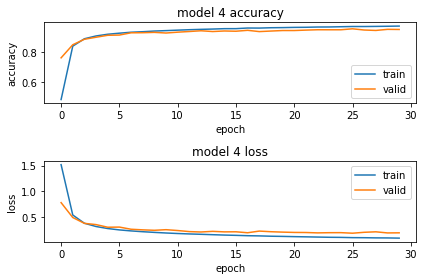

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model 4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model 4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

plt.tight_layout()

# **Conclusion**

After setting the epoch to 30, we've recorded processing times with various models of different layers and nodes per layer in Tensorflow Keras with data set MNIST, and we've found out that the processing times are actually very similar for all trails. And of course, the less layers and nodes can result in less processing time. 

We've also recorded the training accuracies and testing accuracies for all models, and we've found out that the more layers and more nodes, the higher the accuracy. 

I believe the most trustworthy model out of these 4 models is one with 5 layders and 20 nodes per layer, because it is with highest training accuracy of 0.970594	and testing accuracy of 0.948929. Also its running time is very similar to other models, only with a 2.68s difference comparing to the fastest model. 
  